In [ ]:
#Import the necessary methods from tweepy library
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
#Variables that contain the user credentials to access Twitter API
#(Note: replace with your own values from https://apps.twitter.com/)
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
ACCESS_TOKEN= ''
ACCESS_SECRET = ''
class listener(StreamListener):
#This is a basic listener that just prints received tweets
   def on_data(self, data):
    try:
        #writing data to file
        saveFile = open('DigitalCoins.csv','a')
        saveFile.write(data)
        saveFile.close()
        return(True)
    except BaseException as e:
        print('failed ondata,',str(e))
        time.sleep(5)
def on_error(self, status):
        print(status)
auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
twitterStream = Stream(auth, listener())
# getting tweets that have any of these words
twitterStream.filter(track=['Bitcoin','Ethereum','Zcash'],languages=['en'])

In [1]:
## Retrieving tweet nformation from file
import simplejson as json
tweets_data_path = 'Coins.csv'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [2]:
### Function to find the coin names inside each tweet .... I remove the tweets with multiple coin names
def coin_in_tweet(coin, tweet):
    tweet = tweet.lower()
    A=''
    for i in coin:
        i = i.lower()
        if (i in tweet):
            A= A + i 
    if (A==('')) | (len(A)>10):
        return NaN
    else:
        return A

In [3]:
### Creating a Pandas dataFrame containing some tweeter properties like, the number of likes, Coin_name, Number of Retweets
import pandas as pd
tweets = pd.DataFrame()
index = 0
for num, line in enumerate(tweets_data):
    try:
        #print(num,line['text'])
        tweets.loc[index,'text'] = line['text']
        tweets.loc[index,'Date'] = pd.to_datetime(line['created_at'])
        tweets.loc[index,'Likes'] = line['favorite_count']
        tweets.loc[index,'RTs'] = line['retweet_count']
        tweets.loc[index,'coin_name'] = coin_in_tweet(['Bitcoin','Ethereum','Zcash'], line['text'])
        index = index + 1 
    except:
        #print(num, "line not parsed")
        continue

In [4]:
## Using TextBlob to find the polarity of all the tweets
from textblob import TextBlob
for index, row in tweets.iterrows():
    temp = TextBlob(row['text'])
    tweets.loc[index,'sentscore'] = temp.sentiment.polarity

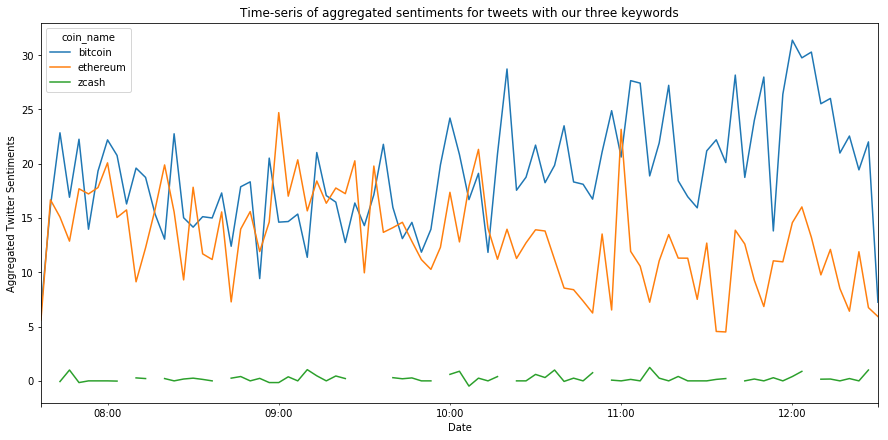

In [36]:

## Plotting all coin sentiments aggregated in a minute grouped by coin_name
import matplotlib.pyplot as plt
# plot data
fig, ax = plt.subplots(figsize=(15,7))
plt.ylabel('Aggregated Twitter Sentiments')
plt.title('Time-seris of aggregated sentiments for tweets with our three keywords')
# use unstack()
tweets.groupby([pd.Grouper(key='Date',freq='200s'),'coin_name']).sum()['sentscore'].unstack().plot(ax=ax)
plt.show()
#fig.savefig('Desktop\Coins.png')

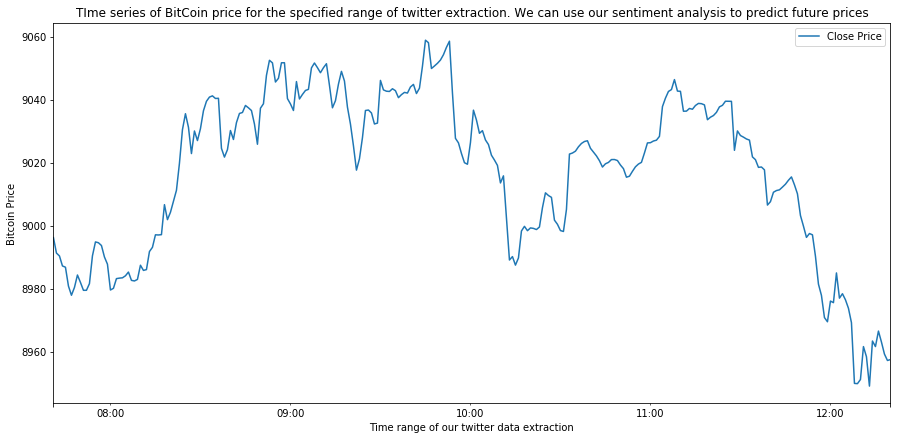

In [37]:
C = pd.read_csv('Desktop\coindesk.csv',low_memory=False)

C['Close Price']=C['Close Price'].astype(float)
C=C.dropna()
C['Date'] = pd.to_datetime(C['Date'])

fig, ax = plt.subplots(figsize=(15,7))
C[1900:2180].plot('Date','Close Price',ax=ax)
plt.ylabel('Bitcoin Price')
plt.title('TIme series of BitCoin price for the specified range of twitter extraction. We can use our sentiment analysis to predict future prices')
plt.xlabel('Time range of our twitter data extraction')
plt.show()

fig.savefig('Desktop\BitCoinPrice.png')
